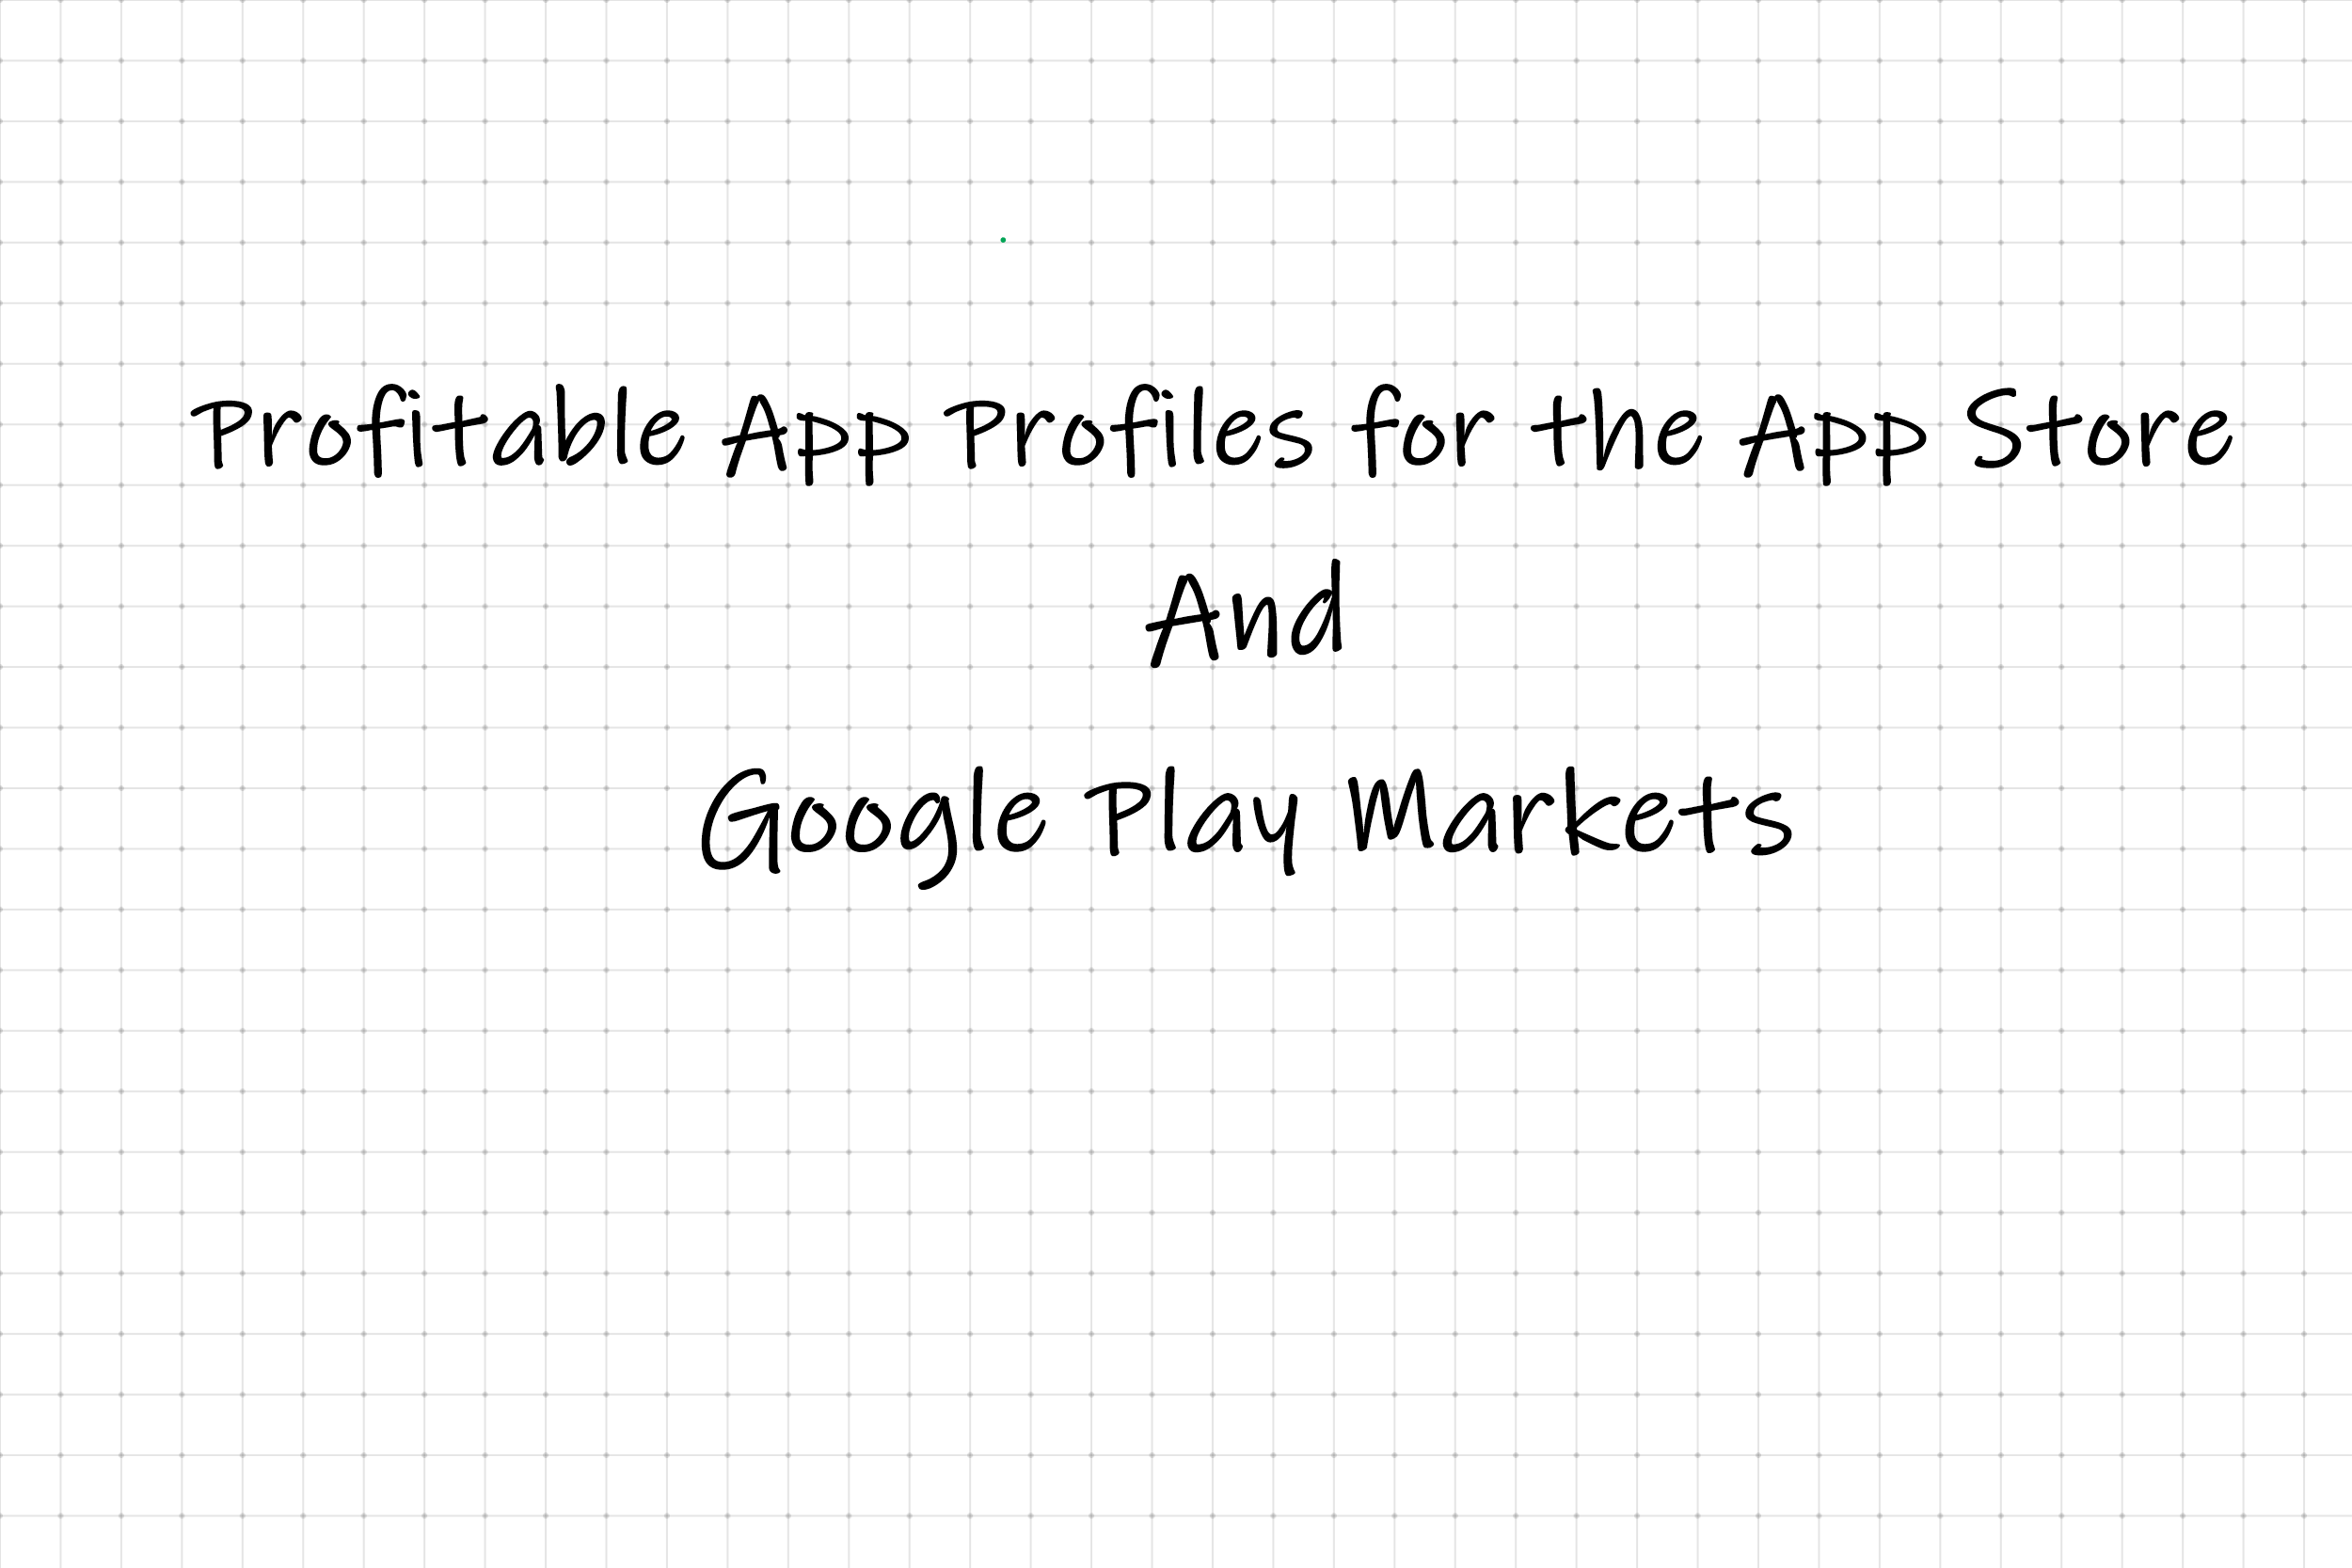

##**Project Aim is to help our developers understand what type of apps are likely to attract more users on Google Play and the App Store. To do this, we'll need to collect and analyze data about mobile apps available on Google Play and the App Store.**

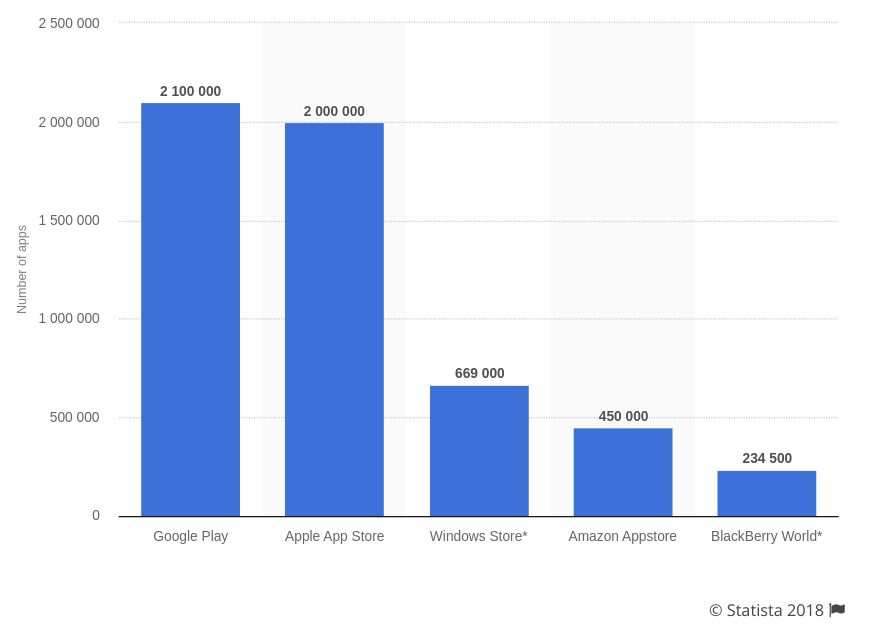

In [ ]:
from csv import reader

# Creating Dataset 

In [ ]:
open_AppleStore = open('AppleStore.csv')
open_playstore = open('googleplaystore.csv')
appleStore = list(reader(open_AppleStore))
playStore = list(reader(open_playstore))

# Create  explore_data() function 

In [ ]:
#explore data function will help us to explore our new dataset's
def explore_data(dataset,header=True):
    if header:
        for i in dataset:
            print(i)
            print('\n')
    else:
        for i in dataset[1:]:
            print(i)
            print('\n') 

# Use explore_data() function to explore dataset 

In [ ]:
#here we are exploring only 6 rows(in appleStore)
explore_data(appleStore[0:6],header=True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']




In [ ]:
#here we are exploring only 6 rows(in playStore)
explore_data(playStore[0:6],header=True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Eve

# Data Cleaning and Deal with missing data 

In [ ]:
playStoreLength = playStore[0]
playStoreLength

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [ ]:
for i in playStore[1:]:
    if len(i) != len(playStoreLength):
        print(i)
        print('\n')
        print(playStore.index(i))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


10473


####  Deleting index number 10473 from playstore

In [ ]:
del playStore[10473]

#### Find duplicate values

In [ ]:
uniq_values = []
duplicate_values = []
for i in playStore[1:]:
    if i in uniq_values:
        duplicate_values.append(i)
    else:
        uniq_values.append(i)          

In [ ]:
len(uniq_values)

10357

In [ ]:
len(duplicate_values)

483

In [ ]:
for i in duplicate_values:
    if i[0] == 'Instagram':
        print(i)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


#### we won't remove the duplicates randomly. we will keep the data that have higher number of review 

In [ ]:
reviews_max = {}
for i in playStore[1:]:
    name = i[0]
    n_review = float(i[3])
    if name in reviews_max and n_review > reviews_max[name]:
        reviews_max[name] = n_review
    elif name not in reviews_max:
        reviews_max[name] = n_review

In [ ]:
len(reviews_max)

9659

####  Use the dictionary we created above to remove the duplicate rows

In [ ]:
#we will store new clean data here
android_clean = []

#just to store app names
already_added = []

for i in playStore[1:]:
    name = i[0]
    n_reviews = float(i[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(i)
        already_added.append(name)

In [ ]:
len(android_clean)

9659

# Remove Non-English Apps 

 We're not interested in keeping these apps, so we'll remove them. One way to do this is to remove each app with a name containing a symbol that isn't commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;), and other symbols (+, *, /).
 
Each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character 'a' is 97, character 'A' is 65, and character '爱' is 29,233. We can get the corresponding number of each character using the ord() built-in function.



In [ ]:
def checkEnglishString(data):
    n_nonEnglish = 0
    for i in data:
        check = ord(i)
        if check > 127 and n_nonEnglish >= 3:
            return False
        elif check > 127:
            n_nonEnglish += 1
    return True   


################################--NOTE--#####################################
##If the input string has more than three characters that fall outside the ASCII range (0 - 127), then the function should return False

####  Checking by giving some input inside function

In [ ]:
checkEnglishString('Instagram')

True

In [ ]:
checkEnglishString('Docs To Go™ Free Office Suite')

True

In [ ]:
checkEnglishString('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

In [ ]:
checkEnglishString('Instachat 😜')

True

The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the ASCII (American Standard Code for Information Interchange) system. Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters.

If an app name contains a character that is greater than 127, then it probably means that the app has a non-English name.

In [ ]:
PlayStore = []
for i in android_clean:
    if checkEnglishString(i[0]) == True:
         PlayStore.append(i)
AppleStore = []
for i in appleStore:
    if checkEnglishString(i[1]) == True:
         AppleStore.append(i)            

In [ ]:
AppleStore

[['id',
  'track_name',
  'size_bytes',
  'currency',
  'price',
  'rating_count_tot',
  'rating_count_ver',
  'user_rating',
  'user_rating_ver',
  'ver',
  'cont_rating',
  'prime_genre',
  'sup_devices.num',
  'ipadSc_urls.num',
  'lang.num',
  'vpp_lic'],
 ['284882215',
  'Facebook',
  '389879808',
  'USD',
  '0.0',
  '2974676',
  '212',
  '3.5',
  '3.5',
  '95.0',
  '4+',
  'Social Networking',
  '37',
  '1',
  '29',
  '1'],
 ['389801252',
  'Instagram',
  '113954816',
  'USD',
  '0.0',
  '2161558',
  '1289',
  '4.5',
  '4.0',
  '10.23',
  '12+',
  'Photo & Video',
  '37',
  '0',
  '29',
  '1'],
 ['529479190',
  'Clash of Clans',
  '116476928',
  'USD',
  '0.0',
  '2130805',
  '579',
  '4.5',
  '4.5',
  '9.24.12',
  '9+',
  'Games',
  '38',
  '5',
  '18',
  '1'],
 ['420009108',
  'Temple Run',
  '65921024',
  'USD',
  '0.0',
  '1724546',
  '3842',
  '4.5',
  '4.0',
  '1.6.2',
  '9+',
  'Games',
  '40',
  '5',
  '1',
  '1'],
 ['284035177',
  'Pandora - Music & Radio',
  '130242560'

**So far in the data cleaning process, we've done the following:**

**-->Removed inaccurate data**

**-->Removed duplicate app entries**

**-->Removed non-English apps**

we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis. 

In [ ]:
len(AppleStore)

6184

In [ ]:
len(PlayStore)

9614

#### AppleStore Free Apps 

In [ ]:
#the index number of column about app price in AppleStore is "5"
appleStoreFree = []
appleStoreNotFree = []
for i in AppleStore[1:]:
    if i[4] == "0.0" or i[4] == "0":
        appleStoreFree.append(i)
    else:
        appleStoreNotFree.append(i)

In [ ]:
len(appleStoreFree)

3222

#### PlayStore Free Apps 

In [ ]:
#the index number of column about app price in PlayStore is "7"
playStoreFree = []
playStoreNotFree = []
for i in PlayStore:
    if i[7] == "0":
        playStoreFree.append(i)
    else:
        playStoreNotFree.append(i)

In [ ]:
len(playStoreFree)

8864

our goal is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue.

To minimize risks and overhead, our validation strategy for an app idea has three steps:

1.Build a minimal Android version of the app, and add it to Google Play.
2.If the app has a good response from users, we develop it further.
3.If the app is profitable after six months, we build an iOS version of the app   and add it to the App Store.

# Generate Frequency tables to determine common genres for each market

In [ ]:
def freq_table(dataset,index):
    appgenres = {}
    for i in dataset:
        genres = i[index]
        if genres in appgenres:
            appgenres[genres] += 1
        else:
            appgenres[genres] = 1
    return appgenres      

In [ ]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

In [ ]:
#Playstore
display_table(playStoreFree,9)

Tools : 749
Entertainment : 538
Education : 474
Business : 407
Productivity : 345
Lifestyle : 345
Finance : 328
Medical : 313
Sports : 307
Personalization : 294
Communication : 287
Action : 275
Health & Fitness : 273
Photography : 261
News & Magazines : 248
Social : 236
Travel & Local : 206
Shopping : 199
Books & Reference : 190
Simulation : 181
Dating : 165
Arcade : 164
Video Players & Editors : 157
Casual : 156
Maps & Navigation : 124
Food & Drink : 110
Puzzle : 100
Racing : 88
Role Playing : 83
Libraries & Demo : 83
Auto & Vehicles : 82
Strategy : 81
House & Home : 73
Weather : 71
Events : 63
Adventure : 60
Comics : 54
Beauty : 53
Art & Design : 53
Parenting : 44
Card : 40
Casino : 38
Trivia : 37
Educational;Education : 35
Board : 34
Educational : 33
Education;Education : 30
Word : 23
Casual;Pretend Play : 21
Music : 18
Racing;Action & Adventure : 15
Puzzle;Brain Games : 15
Entertainment;Music & Video : 15
Casual;Brain Games : 12
Casual;Action & Adventure : 12
Arcade;Action & Advent

In [ ]:
#Applestore
display_table(appleStoreFree,11)

Games : 1874
Entertainment : 254
Photo & Video : 160
Education : 118
Social Networking : 106
Shopping : 84
Utilities : 81
Sports : 69
Music : 66
Health & Fitness : 65
Productivity : 56
Lifestyle : 51
News : 43
Travel : 40
Finance : 36
Weather : 28
Food & Drink : 26
Reference : 18
Business : 17
Book : 14
Navigation : 6
Medical : 6
Catalogs : 4


In [ ]:
appleStoreGenre = freq_table(appleStoreFree,11)
playStoreGenre = freq_table(playStoreFree,9)

In [ ]:
for i in appleStoreGenre:
    for j in playStoreGenre:
        if i == j:  
            print(f'''                           **{j}**                  
                  PlayStore= {playStoreGenre[j]} | AppleStore= {appleStoreGenre[i]}\n\n''')

                           **Music**                  
                  PlayStore= 18 | AppleStore= 66


                           **Health & Fitness**                  
                  PlayStore= 273 | AppleStore= 65


                           **Weather**                  
                  PlayStore= 71 | AppleStore= 28


                           **Shopping**                  
                  PlayStore= 199 | AppleStore= 84


                           **Lifestyle**                  
                  PlayStore= 345 | AppleStore= 51


                           **Entertainment**                  
                  PlayStore= 538 | AppleStore= 254


                           **Food & Drink**                  
                  PlayStore= 110 | AppleStore= 26


                           **Sports**                  
                  PlayStore= 307 | AppleStore= 69


                           **Finance**                  
                  PlayStore= 328 | AppleStore= 36




The frequency tables we analyzed on the previous screen showed us that apps designed for fun dominate the App Store, while Google Play shows a more balanced landscape of both practical and fun apps. Now, we'd like to determine the kind of apps with the most users.

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

In [ ]:
for i in playStoreGenre:
    total = 0
    len_genre = 0
    for j in playStoreFree:
                genre_app = j[9]
                if genre_app == i:
                    user_rating = float(j[2])
                    total += user_rating
                    len_genre += 1
    if total != 'nan':
        avg_rating = total/len_genre
        print(i,":",avg_rating)

Art & Design : nan
Art & Design;Creativity : 4.35
Auto & Vehicles : nan
Beauty : nan
Books & Reference : nan
Business : nan
Comics : nan
Comics;Creativity : 4.8
Communication : nan
Dating : nan
Education : nan
Education;Creativity : 4.375
Education;Education : 4.303333333333332
Education;Pretend Play : 4.1
Education;Brain Games : 4.433333333333334
Entertainment : nan
Entertainment;Brain Games : 4.3
Entertainment;Creativity : 4.533333333333333
Entertainment;Music & Video : 4.180000000000001
Events : nan
Finance : nan
Food & Drink : nan
Health & Fitness : nan
House & Home : nan
Libraries & Demo : nan
Lifestyle : nan
Lifestyle;Pretend Play : 4.0
Card : nan
Arcade : nan
Puzzle : nan
Racing : nan
Sports : nan
Casual : nan
Simulation : nan
Adventure : nan
Trivia : nan
Action : nan
Word : nan
Role Playing : nan
Strategy : nan
Board : nan
Music : nan
Action;Action & Adventure : 4.288888888888888
Casual;Brain Games : 4.475
Educational;Creativity : 4.2
Puzzle;Brain Games : 4.333333333333332
Educ

After analyze the result app profile recommendation for PlayStore 

**1.Puzzle,Education**

**2.Entertainment,Creativity**

**3.Racing,Pretend Play**

In [ ]:
for i in appleStoreGenre:
    total = 0
    len_genre = 0
    for j in appleStoreFree:
                genre_app = j[11]
                if genre_app == i:
                    user_rating = float(j[7])
                    total += user_rating
                    len_genre += 1
 
    avg_rating = total/len_genre
    print(i,':',avg_rating)


Social Networking : 3.5943396226415096
Photo & Video : 3.903125
Games : 4.037086446104589
Music : 3.946969696969697
Reference : 3.6666666666666665
Health & Fitness : 3.769230769230769
Weather : 3.482142857142857
Utilities : 3.5308641975308643
Travel : 3.4875
Shopping : 3.9702380952380953
News : 3.244186046511628
Navigation : 3.8333333333333335
Lifestyle : 3.411764705882353
Entertainment : 3.5393700787401574
Food & Drink : 3.6346153846153846
Sports : 3.0652173913043477
Book : 3.0714285714285716
Finance : 3.375
Education : 3.635593220338983
Productivity : 4.0
Business : 3.9705882352941178
Catalogs : 4.125
Medical : 3.0


After analyze the result app profile recommendation for AppleStore 

**1.Catalogs**

**2.Games**

**3.Business** 

## In this project, I went through a complete data science workflow:

**I started by clarifying the goal of our project.**

**I collected relevant data.**

**I cleaned the data to prepare it for analysis.**

**I analyzed the cleaned data.**